In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, events, config
sns.set_theme(style='whitegrid')

In [24]:
model = 'FOUR_v200_GFS'
event_list = [events.HeatWave,
              events.Freeze]
heatwave_configuration = config.Config(
    event_types=event_list,
    )
default_forecast_config = config.ForecastSchemaConfig()
cases = evaluate.evaluate(eval_config=heatwave_configuration, forecast_schema_config=default_forecast_config, dry_run=True,)
cases

HeatWave(cases=[IndividualHeatWaveCase(id=1, title='2021 Pacific Northwest', start_date=datetime.datetime(2021, 6, 20, 0, 0), end_date=datetime.datetime(2021, 7, 3, 0, 0), location=Location(latitude=47.6062, longitude=np.float64(237.6679)), bounding_box_degrees=5, event_type='heat_wave', data_vars=['surface_air_temperature'], cross_listed=None, metrics_list=[<class 'extremeweatherbench.metrics.MaxOfMinTempMAE'>, <class 'extremeweatherbench.metrics.RegionalRMSE'>, <class 'extremeweatherbench.metrics.MaximumMAE'>]), IndividualHeatWaveCase(id=2, title='2022 Upper Midwest', start_date=datetime.datetime(2022, 5, 7, 0, 0), end_date=datetime.datetime(2022, 5, 17, 0, 0), location=Location(latitude=41.8781, longitude=np.float64(272.3702)), bounding_box_degrees=5, event_type='heat_wave', data_vars=['surface_air_temperature'], cross_listed=None, metrics_list=[<class 'extremeweatherbench.metrics.MaxOfMinTempMAE'>, <class 'extremeweatherbench.metrics.RegionalRMSE'>, <class 'extremeweatherbench.metr

In [25]:
github_url = 'https://github.com/google/fonts/blob/1082e5cba575b5e0aa2ab8addff278695f3e0905/ofl/dmsans/DMSans%5Bopsz%2Cwght%5D.ttf'


url = github_url + '?raw=true'  # You want the actual file, not some html

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop = fm.FontProperties(fname=f.name)

# .fontManager.addfont()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)

/var/folders/vz/txd62qzn76g9f6cxg_8_76cw0000gn/T/ipykernel_77732/328815173.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)  # 5 discrete colors for 5 years


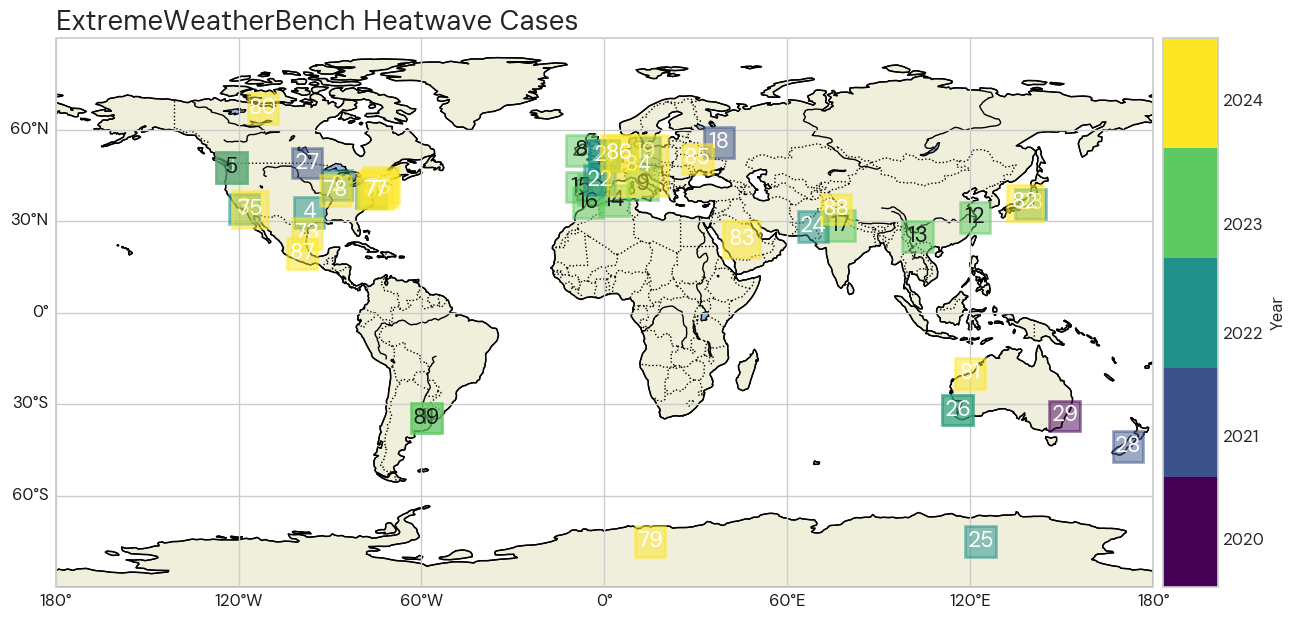

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 12, 'color': 'k', 'fontproperties': prop}
gl.ylabel_style = {'size': 12, 'color': 'k', 'fontproperties': prop}
# Plot boxes for each heat wave case
for indiv_case in cases.cases:
    lat = indiv_case.location.latitude
    lon = indiv_case.location.longitude
    half_box = indiv_case.bounding_box_degrees

    # Create a rectangle around the indiv_case location
    # Change edgecolor based on the date
    # Use a colormap to determine the edgecolor based on the year
    # Define a discrete colormap
    cmap = plt.cm.get_cmap('viridis', 5)  # 5 discrete colors for 5 years

    # Normalize the colormap to the range of years
    norm = plt.Normalize(2020, 2024)
    edgecolor = cmap(norm(indiv_case.start_date.year))

    rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                             linewidth=2, edgecolor=edgecolor, facecolor=edgecolor, transform=ccrs.PlateCarree(),zorder=10,alpha=0.5)
    ax.add_artist(rect)
    # Plot the id number next to each rectangle
    if indiv_case.end_date.year == 2023:
        ax.text(lon, lat, str(indiv_case.id), transform=ccrs.PlateCarree(), fontsize=16, ha='center', va='center', color='k', fontproperties=prop, bbox=dict(facecolor=edgecolor, alpha=0, edgecolor=None), zorder=10, fontweight='bold')
    else:
        ax.text(lon, lat, str(indiv_case.id), transform=ccrs.PlateCarree(), fontsize=16, ha='center', va='center', color='white', fontproperties=prop, bbox=dict(facecolor=edgecolor, alpha=0, edgecolor=None), zorder=10, fontweight='bold')
    # ax.text(lon, lat, str(indiv_case.id), transform=ccrs.PlateCarree(), fontsize=12, ha='center', va='center', color=edgecolor, bbox=dict(facecolor=edgecolor, alpha=0, edgecolor=None))

# Add a colorbar for the colormap
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)


# Create a ScalarMappable with the discrete colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add a colorbar with discrete colorscbar = plt.colorbar(sm, cax=cax, orientation='vertical', ticks=range(2019, 2024))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax, orientation='vertical', ticks=range(2020, 2024))
# cbar = plt.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label('Year',fontproperties=prop,)
# Center each year on the center of each color
cbar.set_ticks([2020.35, 2021.1, 2021.85, 2022.65, 2023.55])
cbar.set_ticklabels([ 2020, 2021, 2022, 2023, 2024],fontproperties=prop,)
cbar.ax.tick_params(size=0)
ax.set_title('ExtremeWeatherBench Heatwave Cases',loc='left', fontproperties=prop,fontsize=20)
plt.savefig('heatwave_cases.png', transparent=True)